In this project, I want to use three analysis to explore the CSCS data, namely hypothesis test, confidence interval and linear regression.

1.Hypothesis test (we learn it in Week05) 

Research question: The relationship between people’s wellness level and social status. 

Population parameter: mean of WELLNESS_life_satisfaction for each group in population 

In this analysis, I will use two variables DEMO_relationship_status and WELLNESS_life _satisfaction because they represents people’s social connection status and wellness level, related to our topic. I will divide DEMO_relationship_status into 2 groups, Have relationship (group1) and No relationship (group2). We can use bar plots to show the data since relation_status is categorical data. 

And I will use hypothesis test, we assume that the null hypothesis is H0: mean1 <= mean2, where mean1 and mean2 are the mean values of WELLNESS_life_satisfaction in group1 and group2. We predict we can reject the null hypothesis by demonstrating the p-value is lower than 0.05 (a common used threshold). 

Our topic is stress the importance of social connection and community engagement, therefore we predict p-value < 0.05 and our analysis can demonstrate that people who has a relationship has a higher wellness satisfaction, which corresponds to the alternative hypothesis H1: mean1 > mean2. If we reject the null hypothesis, indicating that people who has a relationship might has a higher wellness satisfaction, thus demonstrating that significance of social connections. 

Here below is the code I use to calculate the p-value, the result shows p-value < 0.001, indicating a very strong evidence against the null hypothesis, as same as our assumption.

/tmp/ipykernel_70/2857667275.py:6: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


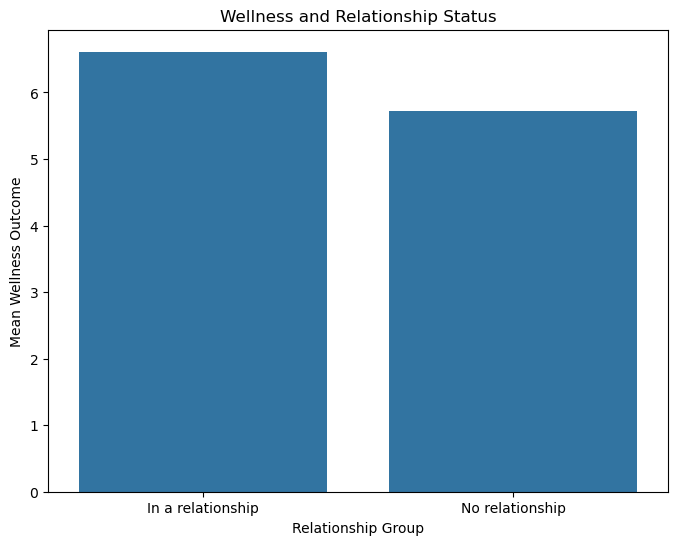

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

connection_data = df[['DEMO_relationship_status', 'WELLNESS_life_satisfaction']].dropna()
connection_data = connection_data[connection_data['DEMO_relationship_status'] != 'Presented but no response']
connection_data['Relationship_group'] = connection_data['DEMO_relationship_status'].replace({
    'In a relationship ': 'Have relationship',
    'Single and dating': 'No relationship',
    'Single and not dating': 'No relationship'
})

wellness_means = connection_data.groupby('Relationship_group')['WELLNESS_life_satisfaction'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Relationship_group', y='WELLNESS_life_satisfaction', data=wellness_means)
plt.title('Wellness and Relationship Status')
plt.ylabel('Mean Wellness Outcome')
plt.xlabel('Relationship Group')
plt.show()

In [3]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(url)

connection_data = df[['CONNECTION_social_days_family_p7d', 'CONNECTION_social_days_friends_p7d', 
                      'CONNECTION_social_num_close_friends', 'CONNECTION_preference_time_family', 
                      'CONNECTION_social_num_friends_p7d', 'DEMO_relationship_status', 
                      'WELLNESS_gad_score', 'WELLNESS_life_satisfaction']]

connection_data = connection_data.dropna(subset=['DEMO_relationship_status', 'WELLNESS_life_satisfaction'])
connection_data['Relationship_group'] = connection_data['DEMO_relationship_status'].replace({
    'In a relationship ': 'Have relationship',
    'Single and dating': 'No relationship',
    'Single and not dating': 'No relationship'
})
connection_data = connection_data.dropna()

group1 = connection_data[connection_data['Relationship_group'] == 'Have relationship']
group2 = connection_data[connection_data['Relationship_group'] == 'No relationship']

result_group1 = group1['WELLNESS_life_satisfaction'].values
result_group2 = group2['WELLNESS_life_satisfaction'].values

observed_diff = np.mean(result_group1) - np.mean(result_group2)

combined = np.concatenate([result_group1, result_group2])

n_iterations = 10000
size1 = len(result_group1)
size2 = len(result_group2)

bootstrap_diffs = np.zeros(n_iterations)
np.random.seed(0)

for i in range(n_iterations):
    bootstrap_sample1 = np.random.choice(combined, size = size1, replace = True)
    bootstrap_sample2 = np.random.choice(combined, size = size2, replace = True)
    
    bootstrap_diffs[i] = np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2)
    
extreme_count = np.sum(bootstrap_diffs <= observed_diff)
p_value = extreme_count / n_iterations

print("P-value for the hypothesis 𝜇1 <= 𝜇2):", p_value)

/tmp/ipykernel_70/2607128885.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


P-value for the hypothesis 𝜇1 <= 𝜇2): 0.0


2.Confidence interval (we learn it in Week04) 

Research question: The relationship between people’s wellness level and social activities. 

Population parameter: difference in population means for WELLNESS_life_satisfaction between Having video chat (group1) and No video chat (group2). 

In this analysis, I will use variables CONNECTION_activities_group_video_chat_pm and WELLNESS_life_satisfaction because they represents people’s social activities and wellness level. As similar as analysis1, I will divide CONNECTION_activities_group_video_chat_pm into two groups, namely Having video chat (group1) and No video chat (group2). We can also use bar plots to demonstrate the mean of WELLNESS_life_satisfaction for each group since video chat variable is categorical data. Or we can use box plots to compare the median and distribution for WELLNESS_life_satisfaction in each group. 

We use two samples, namely the corresponding WELLNESS_life_satisfaction for each group, assuming they are Independent and Identically Distributed (iid sample). First drop the missing values in each data frame. Then we sample with replacement from these two samples, then we calculate and keep track of the difference between them, diff = value1 - value2. Repeating this process for many times (bootstrapping) such as 10000, we obtain a bootstrapped sample by putting all of the differences we calculated in this new sample. Based on bootstrapped sample, we find 2.5 percentile and 97.5 percentile, thus creating 95% confidence interval. Then we check whether 95% CI contains 0. 

The topic is emphasize the importance of social connection, then we hope that group1 has a higher WELLNESS_life_satisfaction. We make a hypothesis that 0 is not contained in 95% CI, indicating the difference might be positive and then WELLNESS_life_satisfaction of group1 is higher than group2. In conclusion, if 95% CI does not contain 0, then having social activities can improve one’s wellness level, thus showing that people’s wellness level and social activities has a positive relationship, fitting the topic. This analysis is similar to the question about the effect of vaccine in HW4.

3.Linear Regression (We learn it in Week07, will learn in Week09, 10) 

Research question: The relationship between people’s wellness level and social support. 

Population parameter: intercept coefficient β0, slope coefficients β1, β2 and β3 

Predictor variables (xi): PSYCH_zimet_multidimensional_social_support_family_subscale_score (x1) 

PSYCH_zimet_multidimensional_social_support_friends_subscale_score (x2) 

CONNECTION_social_days_neighbours_p7d (x3) 

Outcome (Yi): WELLNESS_life_satisfaction 

We are interested in the effect of family support, friends support and neighbourhood interaction (they represents social support) on people’s wellness level. Yi = β0 + β1x1 + β2x2 + β3x3 + ϵ (theoretical line), where β0 is intercept coefficient, β1, β2 and β3 are slope coefficients, ϵ is the error term, they are all true values. Assume that the regression is linear, independent and the error term ϵ is normally distributed.

As for visualization, scatter plots with regression line helps directly visualize whether Yi and xi have a linear correlation.

Then we can use pandas and statsmodels to create a fitted model, yi = β0 + β1x1 + β2x2 + β3x3 (fitted line), where yi and coefficients are all estimated values. In order to evaluate our topic, we can first examine whether slope coefficients are positive. In addition, we can calculate R-squared, indicating how well the predictors collectively explain the outcome, thus reflecting the accuracy of our fitted model. 

We make a hypothesis that the Outcome and predictors variable have a linear correlation and slope coefficients β1, β2 and β3 are all positive, indicating that people’s wellness and social support show a positive linear relationship, thus showing the importance of social connection. Furthermore, the value of R-squared closes to 1, indicating a greater proportion of the variance in Yi can be captured by fitted model, indicating a high accuracy of our model

The end of my proposal

And I want to work with Hazel Ma and Sijing Shen in the group project because we had class presentation together before, so we can better assign everyone’s works.